In [1]:
from pandas_datareader import wb
import matplotlib.pyplot as plt

# Data science with Python

#### 1. Get WDI data
* We'll explore how cellphone coverage varies with GDP per capita, using the World Development Indicators.

We'll use the World Development Indicators API. There's a convenient Python library, Pandas Datareader, that gives easy access to this.

In [194]:
# First get country list and take only African countries

country_list = wb.get_countries()
AFR = country_list[country_list.region == 'Sub-Saharan Africa ']
AFR.head()

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.24200,Angola,Sub-Saharan Africa
16,Sub-Saharan Africa (excluding high income),Bujumbura,BDI,Low income,BI,-3.37840,IDA,29.36390,Burundi,Sub-Saharan Africa
20,Sub-Saharan Africa (excluding high income),Porto-Novo,BEN,Low income,BJ,6.47790,IDA,2.63230,Benin,Sub-Saharan Africa
21,Sub-Saharan Africa (excluding high income),Ouagadougou,BFA,Low income,BF,12.36050,IDA,-1.53395,Burkina Faso,Sub-Saharan Africa
39,Sub-Saharan Africa (excluding high income),Gaborone,BWA,Upper middle income,BW,-24.65440,IBRD,25.92010,Botswana,Sub-Saharan Africa


In [195]:
# Next search indicators for 'cell'

In [196]:
#indicators[indicators.source == "World Development Indicators"]
wb.search(string="cell*",field = 'name').head()


,id,name,source,sourceNote,sourceOrganization,topics,unit
1769,DC.DAC.ISLL.CD,"Net bilateral aid flows from DAC donors, Icela...",World Development Indicators,Net bilateral aid flows from DAC donors are th...,b'Development Assistance Committee of the Orga...,Aid Effectiveness,
6801,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%),WDI Database Archives,,b'',,
6802,IT.CEL.SETS,Mobile cellular subscriptions,World Development Indicators,Mobile cellular telephone subscriptions are su...,"b'International Telecommunication Union, World...",Infrastructure,
6803,IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),World Development Indicators,Mobile cellular telephone subscriptions are su...,"b'International Telecommunication Union, World...",Infrastructure,
6806,IT.CELL.3MIN.CD.OP,Mobile cellular - price of 3-minute local call...,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",,


#### --> OK we'll use 'IT.CEL.SETS.P2'
We'll check first for South Africa only.

We'll use the data_reader library to get the series since 1990 for South Africa. By checking its documentation, you can see that the function requires the three-letter country code (iso3c).

In [296]:
cellphone_code = 'IT.CEL.SETS.P2'
GNI_capita_code = "NY.GNP.PCAP.CD"

In [297]:
country = AFR[AFR.name=='South Africa']
countries = AFR.iso3c[:5].tolist()
countries

['AGO', 'BDI', 'BEN', 'BFA', 'BWA']

In [364]:
reader = wb.WorldBankReader(symbols=cellphone_code,countries = countries,start=1990)
cell_coverage = reader.read()


In [365]:
cell_coverage = cell_coverage[cellphone_code].unstack(level=0)

In [366]:
cell_coverage.reset_index(inplace=True)
cell_coverage.head()

country,year,Angola,Benin,Botswana,Burkina Faso,Burundi
0,1990,0.000000,0.0,0.0,0.0,0.000000
1,1991,0.000000,0.0,0.0,0.0,0.000000
2,1992,0.000000,0.0,0.0,0.0,0.000000
3,1993,0.008207,0.0,0.0,0.0,0.006116
4,1994,0.013178,0.0,0.0,0.0,0.006438


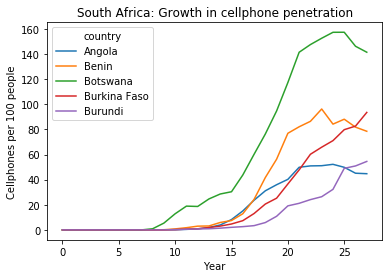

In [358]:
cell_coverage.plot()
plt.title('South Africa: Growth in cellphone penetration')
plt.ylabel('Cellphones per 100 people')
plt.xlabel('Year')
plt.legend=False

## 2. Get cellphone coverage / income for 2015 across AFR countries

In [388]:
country = AFR[AFR.name=='South Africa']
countries = AFR.iso3c.tolist()

In [389]:
reader = wb.WorldBankReader(symbols=[GNI_capita_code,cellphone_code],countries = countries,start=2015,end=2015)
data = reader.read()

In [390]:
data.reset_index(inplace=True)

In [391]:
data.drop('year',axis=1,inplace=True)

In [392]:
data.set_index('country',inplace=True)

In [393]:
data.rename(columns={'NY.GNP.PCAP.CD':'GNI_per_capita','IT.CEL.SETS.P2':'cellphones_per_100_people'},inplace=True)
data.head()

,GNI_per_capita,cellphones_per_100_people
country,,
Angola,4520.0,49.838042
Burundi,260.0,49.000527
Benin,860.0,88.105118
Burkina Faso,630.0,79.770288
Botswana,6680.0,157.311774


In [415]:
data.shape

(48, 2)

# Clean the dataset
--> except it's not that noisy

In [416]:
data.dropna(inplace=True)
data.shape

(46, 2)

In [386]:
#data.rename(columns=['GNI_per_capita','cellphones_per_100_people'],inplace=True)
#data.head()

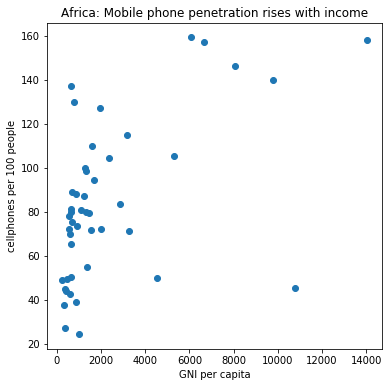

In [417]:
fig,ax = plt.subplots(figsize=[6,6])

ax.scatter(data.GNI_per_capita, data.cellphones_per_100_people)
ax.set(xlabel = 'GNI per capita', ylabel = 'cellphones per 100 people',title='Africa: Mobile phone penetration rises with income');

In [404]:
import statsmodels.api as sm

In [451]:
y = data.cellphones_per_100_people
X = data.GNI_per_capita

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.params


const             68.764692
GNI_per_capita     0.006229
dtype: float64

In [452]:
model.params[1]

0.0062285813689794255

In [445]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     cellphones_per_100_people   R-squared:                       0.282
Model:                                   OLS   Adj. R-squared:                  0.265
Method:                        Least Squares   F-statistic:                     17.25
Date:                       Wed, 06 Feb 2019   Prob (F-statistic):           0.000148
Time:                               00:02:04   Log-Likelihood:                -221.75
No. Observations:                         46   AIC:                             447.5
Df Residuals:                             44   BIC:                             451.2
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             68.7647      5.744     11.972      0.000      57.189      80.340
GNI_per_capita     0.0062      0.001      4.153      0.000       0.003       0.009
==============================================================================
Omnibus:                        2.319   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.350
Skew:                          -0.283   Prob(JB):                        0.509
Kurtosis:                       3.619   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""